In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt 

In [2]:
atac_enrich = pd.read_csv('/gpfs/ysm/project/girgenti/cl2553/C2C/figA-C2C_overview/subclass_markerExpr.csv')

In [3]:
atac_enrich = atac_enrich[atac_enrich.columns[::-1]]

In [4]:
atac_enrich

,L6b_ALZ,L6b_CON,L6 IT Car3_ALZ,L6 IT Car3_CON,L6 IT_ALZ,L6 IT_CON,L6 CT_ALZ,L6 CT_CON,L5/6 NP_ALZ,L5/6 NP_CON,...,OPC_CON,Oligo_ALZ,Oligo_CON,Micro/PVM_ALZ,Micro/PVM_CON,Endo_ALZ,Endo_CON,Astro_ALZ,Astro_CON,featurekey
0,0.105056,0.171741,0.082461,0.166601,0.255922,0.301507,0.037255,0.065836,0.000000,0.141144,...,0.095796,0.006209,0.004459,0.031915,0.063570,0.299485,0.000000,5.221934,4.901393,AQP4
1,0.007721,0.091765,0.007926,0.044500,0.012568,0.046211,0.000000,0.000000,0.000000,0.033017,...,0.042230,0.004268,0.010348,0.047776,0.037376,0.526144,1.031118,5.655661,4.782771,GJA1
2,0.043565,0.031302,0.029344,0.078367,0.026469,0.046175,0.013554,0.012744,0.017032,0.051485,...,0.045219,0.014897,0.011646,0.304727,0.110986,7.146612,7.030376,0.028039,0.004722,FLT1
3,0.108626,0.047453,0.000000,0.000000,0.000000,0.001959,0.000000,0.012900,0.000000,0.000000,...,0.000000,0.000783,0.001041,0.000000,0.000000,8.118971,8.646247,0.025326,0.016645,CLDN5
4,0.051493,0.040057,0.009069,0.043664,0.024600,0.044592,0.017867,0.042258,0.120733,0.050710,...,0.049880,0.011260,0.015313,5.837798,5.559642,0.000000,0.000000,0.023364,0.030013,APBB1IP
5,0.000000,0.011220,0.000000,0.000000,0.002530,0.004905,0.000000,0.000000,0.014005,0.000000,...,0.012110,0.001435,0.003436,2.232377,2.112428,0.000000,0.000000,0.002601,0.009194,CX3CR1
6,0.155108,0.107586,0.136314,0.208934,0.172620,0.246647,0.117681,0.066728,0.305572,0.331365,...,0.047830,4.595826,4.636469,0.027413,0.121995,0.000000,0.000000,0.043093,0.123943,MOBP
7,0.011041,0.047829,0.036650,0.023008,0.013839,0.035911,0.000000,0.035307,0.018759,0.035502,...,0.177169,2.760363,2.696379,0.014333,0.046810,0.000000,0.000000,0.027666,0.042542,MOG
8,0.043569,0.064535,0.031944,0.032289,0.019717,0.029494,0.031702,0.051999,0.051365,0.099480,...,4.407174,2.331146,1.925437,0.072011,0.010811,0.000000,0.000000,0.544133,0.502642,OLIG1
9,0.023418,0.000000,0.000000,0.114725,0.008740,0.033944,0.009740,0.046965,0.014896,0.075244,...,3.074277,0.958977,0.812838,0.020947,0.014022,0.000000,0.000000,0.130705,0.161787,OLIG2


In [5]:
atac_enrich = atac_enrich.set_index('featurekey')

In [17]:
# atac_enrich.columns = [x.split(' ')[0].split('_')[0] for x in atac_enrich.columns]

In [18]:
# atac_enrich.index = ['INH','OPC','END','OLI','MIC','AST','EXC']

In [19]:
# atac_enrich = atac_enrich.drop('ENSG00000229544',axis=1)

In [20]:
# atac_enrich = atac_enrich[['RFX2', 'JUNB', 'JUN', 'FOSL2', 'FOS', 'JUND','SMARCC1','FOSL1',
#                            'NHLH2', 'ASCL1', 'TFAP4','TCF12', 'NHLH1', 'LYL1', 'MYOG',
#                            'ZFX', 'NFIX', 'ZNF148', 'ZBTB7A', 'KLF6', 'KLF15',
#                            'SOX9', 'SOX13', 'CTCFL', 'SOX4', 'CTCF',
#                            'KLF5', 'SP1', 'KLF4', 'SP2','EBF1',
#                            'NFIC', 'EN1', 'GBX2','GBX1',
#                            'SPIB', 'SPI1','BCL11A', 'BCL11B', 'SPIC', 'ELF5', 'ELF2']]

In [21]:
# atac_enrich = atac_enrich.reindex(['EXC','INH','OPC','OLI','END','AST','MIC'])

In [6]:
#import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors

parameterToColorBy = np.linspace(5, 10, 6, dtype=float)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap

minColor = .8
maxColor = 0
blue = truncate_colormap(plt.get_cmap("Blues_r"), minColor, maxColor)

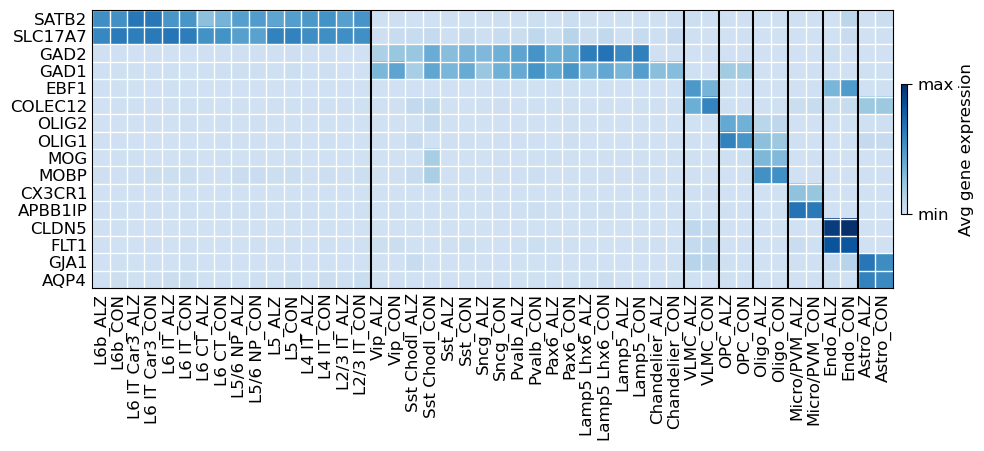

In [9]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.rcParams['font.size'] = '12'
fig, ax = plt.subplots(1,1, figsize=(10,10), sharey=True)

enrich = atac_enrich[::-1]
img = ax.imshow(np.array(enrich),cmap=blue)

#x_labels = ['EXC','INH','END','OPC','MIC','OLI','AST']
x_labels = enrich.columns
# y_labels = ['ExN','InN','OPC','Oligo','Endo','Astro','MG'][::-1]
y_labels = atac_enrich.index.to_list()[::-1]
#ax.xaxis.tick_top()
ax.set_xticks(np.arange(len(enrich.columns)))
ax.set_xticklabels(x_labels,rotation=90)
ax.set_yticks(np.arange(len(enrich.index)))
ax.set_yticklabels(y_labels)
ax.set_aspect(aspect=1)
ax.set_xticks(np.arange(-0.5, enrich.shape[1]-1),minor=True)
ax.set_yticks(np.arange(-0.5, enrich.shape[0]-1),minor=True)
ax.grid(which='minor', color='white', linewidth=1)
ax.grid(which='major',linewidth=0)
ax.tick_params(axis=u'both', which=u'both',length=0)

cb = fig.colorbar(img,fraction=0.008,pad=0.01,location='right')
cb.ax.set_ylabel('Avg gene expression',fontsize=12)
# cb.set_ticks([0,50,100])
cb.set_ticks([atac_enrich.min().min(), atac_enrich.max().max()])
cb.ax.set_yticklabels(['min', 'max'])
cb.ax.tick_params(rotation=0)

for g in [16,34,36,38,40,42,44]:
    ax.axvline(x=g-0.5,color='k')
        
fig.tight_layout()
plt.savefig('/gpfs/ysm/project/girgenti/cl2553/C2C/figures/TF_motifs_heatmap.pdf',bbox_inches='tight',dpi=300)